# Multiple Linear Regression

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dataset=pd.read_csv('Fish.csv')
dataset

,Weight,Length1,Length2,Length3,Height,Width
0,242.0,23.2,25.4,30.0,11.5200,4.0200
1,290.0,24.0,26.3,31.2,12.4800,4.3056
2,340.0,23.9,26.5,31.1,12.3778,4.6961
3,363.0,26.3,29.0,33.5,12.7300,4.4555
4,430.0,26.5,29.0,34.0,12.4440,5.1340
5,450.0,26.8,29.7,34.7,13.6024,4.9274
6,500.0,26.8,29.7,34.5,14.1795,5.2785
7,390.0,27.6,30.0,35.0,12.6700,4.6900
8,450.0,27.6,30.0,35.1,14.0049,4.8438
9,500.0,28.5,30.7,36.2,14.2266,4.9594


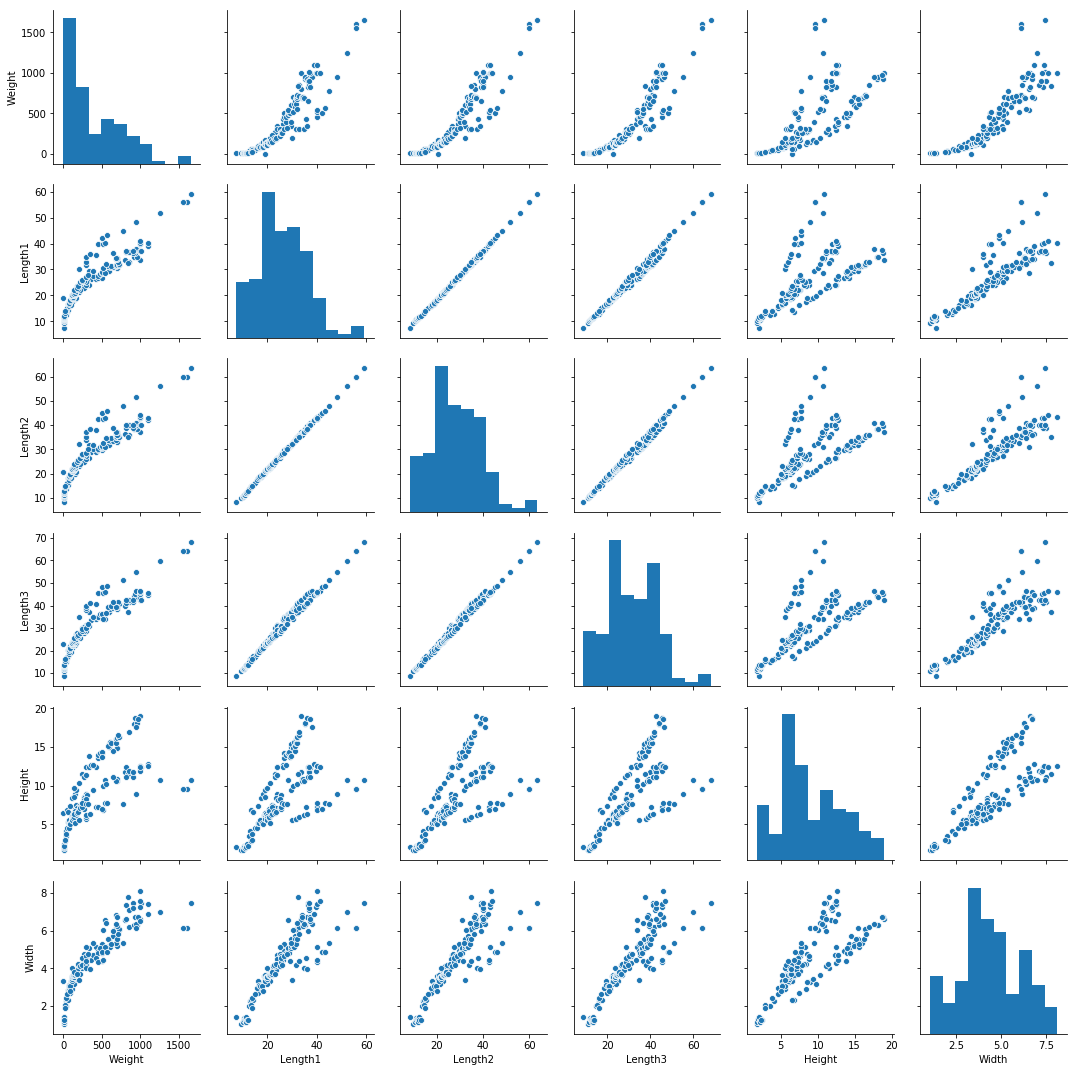

In [3]:
sns.pairplot(dataset)


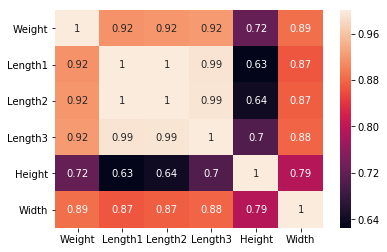

In [4]:
sns.heatmap(dataset.corr(),annot=True)

In [5]:
df=dataset.copy()
df.isnull().sum(axis=0)

Weight     0
Length1    0
Length2    0
Length3    0
Height     0
Width      0
dtype: int64

In [6]:
independent_var=df.iloc[:,1:].values
dependent_var=df.iloc[:,0].values
np.set_printoptions(precision=4)

## Least Square Method from Scratch

In [7]:
class Scaler:
    def __init__(self):
        self.min=None
        self.max=None
    def scale(self,data):
        if self.min is None and self.max is None:
            self.min=data.min(axis=0)
            self.max=data.max(axis=0)
        return (data-self.min) / (self.max-self.min)

    def reverse_scaling(self,data):
        return (data*(self.max-self.min))+self.min

In [8]:
xscaler=Scaler()
yscaler=Scaler()
x=xscaler.scale(independent_var)
y=yscaler.scale(dependent_var)

In [9]:
def splitter(x,y,train_size=0.75,seed=None):
    np.random.seed(seed)
    data=np.concatenate([x,y.reshape(-1,1)],axis=1)
    np.random.shuffle(data)
    xtrain=data[:int(len(data)*train_size),:-1]
    ytrain=data[:int(len(data)*train_size),-1]
    xtest=data[int(len(data)*train_size):,:-1]
    ytest=data[int(len(data)*train_size):,-1]
    return xtrain,ytrain,xtest,ytest

In [10]:
xtrain,ytrain,xtest,ytest=splitter(x,y,train_size=0.85,seed=101)

In [11]:
def matrix_method(x,y):
    ones=np.ones(shape=len(x)).reshape(-1,1)
    x_=np.empty(shape=(len(x),len(x[0])+1))
    x_[:,0]=ones.flatten()
    x_[:,1:]=x.copy()
    x_t=np.transpose(x_)
    y_=y.reshape(-1,1).copy()
    covar_x=np.dot(x_t,x_)
    covar_xy=np.dot(x_t,y_)
    b=(np.linalg.inv(covar_x))@covar_xy
    return b

In [36]:
def predict(x,coeff):
    x_1=np.concatenate([np.ones(shape=(len(x),1)),x],axis=1)
    return (x_1@coeff).flatten()

def make_predictions_from_user():
    xdata=[]
    xdata.append(float(input("Enter the value for Length1(in CMs)")))
    xdata.append(float(input("Enter the value for Length2(in CMs)")))
    xdata.append(float(input("Enter the value for Length3(in CMs)")))
    xdata.append(float(input("Enter the value for Height(in CMs)")))
    xdata.append(float(input("Enter the value for width(in CMs)")))
    print("""!!! MAKING PREDICTIONS!!!""")
    print("The predicted value is : {} grams"
          .format(yscaler.reverse_scaling(predict(xscaler.scale(np.array(xdata)).reshape(1,5),coeff))))

In [13]:
def mse(true,pred):
    return np.mean((pred-true)**2)

def rmse(true,pred):
    return mse(true,pred)**0.5

def mae(true,pred):
    return np.mean(abs(pred-true))

def r_squared(true,pred):
    true_mean=true.mean()
    pred_mean=pred.mean()
    tot=((true-true_mean)**2).sum(axis=0)
    obs=((true-pred)**2).sum(axis=0)
    return 1-(obs/tot)

In [14]:
coeff=matrix_method(xtrain,ytrain)
print("weight :{} \nbias {})".format(coeff[1:,:],coeff[0,:]))

weight :[[ 1.5469]
 [ 0.5595]
 [-1.2978]
 [ 0.3188]
 [-0.0072]] 
bias [-0.1607])


In [27]:
ypred=yscaler.reverse_scaling(predict(xtest,coeff)).flatten()
ytrue=yscaler.reverse_scaling(ytest).flatten()
print("Predictions: \n",ypred)

Predictions: 
 [ 947.8638  127.2694  306.0716  372.3253  928.5376  900.8485   87.6849
 1239.7006  609.4317  -40.9464  791.0693  216.2424  127.7228  156.5144
  328.3628  137.3413   99.9744  194.4728  431.0249  365.5698  869.2145
  167.7285  132.1995  228.6665]


In [16]:
print("MSE : {}".format(mse(ytrue,ypred)))
print("RMSE : {}".format(rmse(ytrue,ypred)))
print("R2 score : {}".format(r_squared(ytrue,ypred)))

MSE : 19928.575822010454
RMSE : 141.16860777811212
R2 score : 0.7933170122944816


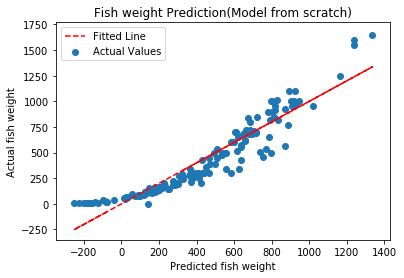

In [17]:
plt.plot(yscaler.reverse_scaling(predict(x,coeff).reshape(-1,1)).flatten(),
            yscaler.reverse_scaling(predict(x,coeff).reshape(-1,1)).flatten(),
            '--',color='red',label='Fitted Line')
plt.scatter(yscaler.reverse_scaling(predict(x,coeff).reshape(-1,1)).flatten(),
            dependent_var,label='Actual Values')
plt.xlabel('Predicted fish weight')
plt.ylabel('Actual fish weight')
plt.title('Fish weight Prediction(Model from scratch)')
plt.legend()
plt.show()

In [37]:
make_predictions_from_user()

Enter the value for Length1(in CMs)15
Enter the value for Length2(in CMs)20
Enter the value for Length3(in CMs)14
Enter the value for Height(in CMs)9
Enter the value for width(in CMs)4
!!! MAKING PREDICTIONS!!!
The predicted value is : [330.2051] grams


## Scikit Learn Implementation

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.preprocessing import MinMaxScaler

In [19]:
scaler=MinMaxScaler()
x=scaler.fit_transform(independent_var)
y=scaler.fit_transform(dependent_var.reshape(-1,1)).flatten()

In [20]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.15,random_state=101)

In [21]:
from sklearn.linear_model import LinearRegression

In [22]:
mlr=LinearRegression()
mlr.fit(xtrain,ytrain)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [23]:
print("weights : {}\n Bias : {}".format(mlr.coef_,mlr.intercept_))

weights : [ 2.3384 -1.0224 -0.7192  0.2622  0.1689]
 Bias : -0.15661883108276986


In [24]:
ytrue=scaler.inverse_transform(ytest.reshape(-1,1)).flatten()
ypred=scaler.inverse_transform(mlr.predict(xtest).reshape(-1,1)).flatten()

In [25]:
print("MSE : {}".format(mean_squared_error(ytrue,ypred)))
print("RMSE : {}".format(r2_score(ytrue,ypred)))
print("R2 score :{}".format(r2_score(ytrue,ypred)))

MSE : 13563.222694136675
RMSE : 0.9178401313900743
R2 score :0.9178401313900743


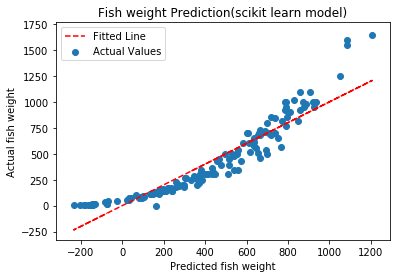

In [26]:
plt.plot(scaler.inverse_transform(mlr.predict(x).reshape(-1,1)).flatten(),
            scaler.inverse_transform(mlr.predict(x).reshape(-1,1)).flatten(),
            '--',color='red',label='Fitted Line')
plt.scatter(scaler.inverse_transform(mlr.predict(x).reshape(-1,1)).flatten(),
            dependent_var,
            label='Actual Values')
plt.xlabel('Predicted fish weight')

plt.ylabel('Actual fish weight')
plt.title('Fish weight Prediction(scikit learn model)')
plt.legend()
plt.show()

In [45]:
xdata=[]
xdata.append(float(input("Enter the value for Length1(in CMs)")))
xdata.append(float(input("Enter the value for Length2(in CMs)")))
xdata.append(float(input("Enter the value for Length3(in CMs)")))
xdata.append(float(input("Enter the value for Height(in CMs)")))
xdata.append(float(input("Enter the value for width(in CMs)")))
print("""!!! MAKING PREDICTIONS!!!""")
print("Predicted fish weight is : ",scaler.inverse_transform(mlr.predict(np.array(xdata).reshape(-1,5)).reshape(-1,1)).flatten(),)

Enter the value for Length1(in CMs)10
Enter the value for Length2(in CMs)9
Enter the value for Length3(in CMs)8
Enter the value for Height(in CMs)6
Enter the value for width(in CMs)5
!!! MAKING PREDICTIONS!!!
Predicted fish weight is :  [17637.0152]
